In [24]:
import pandas as pd
import numpy as np
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import torch

In [25]:
transform_cloud = transforms.Compose([transforms.RandomAutocontrast(),transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(45),transforms.ToTensor(),
                                     transforms.Resize((64,64))])

In [26]:
transform_test = transforms.Compose([transforms.ToTensor(),
                                     transforms.Resize((64,64))])

In [27]:
data_train = ImageFolder('clouds/clouds_train',transform = transform_cloud)

In [28]:
data_test = ImageFolder('clouds/clouds_test', transform = transform_test)

In [29]:
trainload = DataLoader(data_train,batch_size=1,shuffle=True)

In [30]:
testload = DataLoader(data_test,batch_size=16,shuffle=True)

In [31]:
image,label=next(iter(trainload))

In [32]:
image.shape

torch.Size([1, 3, 64, 64])

In [33]:
image=image.squeeze().permute(1,2,0)

In [34]:
import matplotlib.pyplot as plt

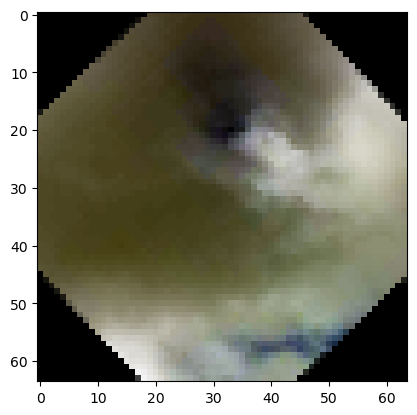

In [35]:
plt.imshow(image)

In [36]:
trainload = DataLoader(data_train,batch_size=16,shuffle=True)

In [37]:
class Net(nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        self.feature_extractor = nn.Sequential(nn.Conv2d(3,32, kernel_size=3, padding=1),
                                              nn.ELU(),nn.MaxPool2d(kernel_size=2),
                                              nn.Conv2d(32,64,kernel_size=3,padding=1),
                                              nn.ELU(),nn.MaxPool2d(kernel_size=2),nn.Flatten())
        self.classifier = nn.Linear(64*16*16,num_classes)

    def forward(self,x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return(x)
        

In [38]:
net = Net(num_classes=7)
from torch.optim import Adam
crit = nn.CrossEntropyLoss()
optimizer = Adam(net.parameters(),lr=0.001)
from torchmetrics import Recall
recall_metric = Recall(task='multiclass',num_classes=7,average='micro')

In [39]:
#Training loop
for epoch in range(10):
    running_loss = 0.0
    valloss = 0.0
    for images,labels in trainload:
        optimizer.zero_grad()
        pred = net(images)
        loss = crit(pred,labels)
        loss.backward()
        optimizer.step()
        running_loss = running_loss + loss.item()
    print("Epoch",epoch," loss is ",running_loss/len(trainload)) 
    net.eval()
    with torch.no_grad():
        for images,labels in testload:
            outputs = net(images)
            loss = crit(outputs,labels)
            valloss = valloss + loss
            _,pred = torch.max(outputs,1)
            recall_metric(pred,labels)
        recall = recall_metric.compute()
        print("Epoch ",epoch, "val loss is ",valloss/len(testload))
        print("Epoch", epoch,"recall is", recall)

Epoch 0  loss is  1.7096736947695415
Epoch  0 val loss is  tensor(1.4612)
Epoch 0 recall is tensor(0.3745)
Epoch 1  loss is  1.2774411956469218
Epoch  1 val loss is  tensor(1.2531)
Epoch 1 recall is tensor(0.4414)
Epoch 2  loss is  1.365074243148168
Epoch  2 val loss is  tensor(1.4519)
Epoch 2 recall is tensor(0.4095)
Epoch 3  loss is  1.2673391183217366
Epoch  3 val loss is  tensor(1.1395)
Epoch 3 recall is tensor(0.4522)
Epoch 4  loss is  1.131753941377004
Epoch  4 val loss is  tensor(1.0564)
Epoch 4 recall is tensor(0.4790)
Epoch 5  loss is  1.1196370194355647
Epoch  5 val loss is  tensor(1.1421)
Epoch 5 recall is tensor(0.4938)
Epoch 6  loss is  1.0935423950354257
Epoch  6 val loss is  tensor(1.1334)
Epoch 6 recall is tensor(0.5053)
Epoch 7  loss is  0.9155155340830485
Epoch  7 val loss is  tensor(1.0213)
Epoch 7 recall is tensor(0.5157)
Epoch 8  loss is  1.0330271224180858
Epoch  8 val loss is  tensor(1.5420)
Epoch 8 recall is tensor(0.5087)
Epoch 9  loss is  1.009452889362971
Epo

### Sequential Data
* Sequential data is ordered data
* Order of data points has dependencies within it
* Do not split the data randomly for time series
* The first thing you need to create is a sequence